# Name:- Yash Bhargava
# Section:- T(53)
# University RollNo:- 2115500160

Importing Required Modules

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

Creating a Randomized Data

In [ ]:
df = pd.DataFrame({
    'x' : [12,20,28,18,29,33,24,45,45,52,51,52,55,52,55,61,64,69,72],
    'y' : [29,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

Genrating Random Centroids

In [ ]:
np.random.seed(200)
k = 3
clusterCentroidsDf = {
    i+1 : [np.random.randint(0,80), np.random.randint(0, 80)] 
    for i in range(k)
} 
clusterCentroidsDf

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

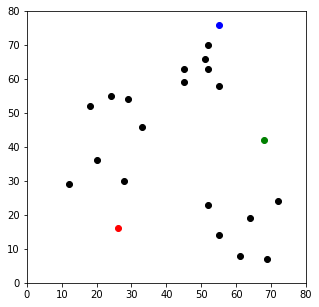

In [ ]:
fig = plt.figure(figsize = [5,5])
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1:'r', 2 : 'g', 3 : 'b'}
for i in clusterCentroidsDf.keys():
  plt.scatter(*clusterCentroidsDf[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [ ]:
km_cao = KModes(n_clusters=k, init = "random", n_init = 300, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 0, cos

In [ ]:
fitClusters_cao
labels = fitClusters_cao
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2],
      dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns
clusterCentroidsDf

,x,y
0,52,63
1,55,14
2,72,24


In [ ]:
clusterCentroidsDf = clusterCentroidsDf.to_numpy()

In [ ]:
clusterCentroidsDf

array([[52, 63],
       [55, 14],
       [72, 24]])

In [ ]:
newClusterCentroids = {
    i + 1 : [clusterCentroidsDf[i][0], clusterCentroidsDf[i][1]]
    for i in range(k)
}

In [ ]:
newClusterCentroids

{1: [52, 63], 2: [55, 14], 3: [72, 24]}

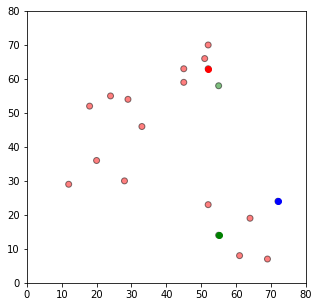

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color = colors1,alpha = 0.5, edgecolor = 'k')
for i in newClusterCentroids.keys():
  plt.scatter(*newClusterCentroids[i],color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()                                                                                                                    

# Conclusion
Datapoints are arranged in particular clusters by calculating the distance between centroids and datapoints respectively.